# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
357746               2020-08-06           2020-08-03            2020-08-03   
357747               2020-08-06           2020-08-03            2020-08-03   
357748               2020-08-06           2020-08-01            2020-08-01   
357749               2020-08-06           2020-08-05            2020-08-02   
357750               2020-08-06           2020-08-04            2020-08-04   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
357746                      Asintomáti                   NaT   
357747                      Asintomáti                   NaT   
357748                      Asintomáti                   NaT   
357749             2020-07-28 00:00:00                   NaT   
357750             2020-08-04 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento  \
Id de caso                                                            
1                         NaT          Bogotá d.c.      Bogotá D.C.   
2                         NaT  Guadalajara de buga  Valle del Cauca   
3                         NaT             Medellín        Antioquia   
4                         NaT             Medellín        Antioquia   
5                         NaT             Medellín        Antioquia   
...                       ...                  ...              ...   
357746                    NaT          Bogotá d.c.      Bogotá D.C.   
357747                    NaT          Bogotá d.c.      Bogotá D.C.   
357748                    NaT          Bogotá d.c.      Bogotá D.C.   
357749                    NaT          Bogotá d.c.      Bogotá D.C.   
357750                    NaT          Bogotá d.c.      Bogotá D.C.   

               Severidad      Estado  ... Clasificación de edad Sexo  \
Id de caso                            ...                              
1                   Leve  Recuperado  ...               10 - 20    F   
2                   Leve  Recuperado  ...               30 - 40    M   
3                   Leve  Recuperado  ...               40 - 50    F   
4                   Leve  Recuperado  ...               50 - 60    M   
5                   Leve  Recuperado  ...               20 - 30    M   
...                  ...         ...  ...                   ...  ...   
357746      Asintomático        Casa  ...               70 - 80    F   
357747      Asintomático        Casa  ...               20 - 30    F   
357748      Asintomático        Casa  ...               60 - 70    F   
357749              Leve        Casa  ...               30 - 40    M   
357750              Leve        Casa  ...               20 - 30    F   

           Pertenecia Étnica Nombre Grupo Étnico         Tipo  \
Id de caso                                                      
1                       Otro                 NaN    Importado   
2                       Otro                 NaN    Importado   
3                       Otro              

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1070   1467
Antioquia                                           20690  24040
Arauca                                                 81    224
Archipiélago de San Andrés Providencia y Santa ...     16     29
Atlántico                                           11518  12802
Barranquilla D.E.                                   14770  17028
Bogotá D.C.                                         61339  62536
Bolívar                                              1309   1641
Boyacá                                                659    717
Buenaventura D.E.                                     813   1372
Caldas                                                585    573
Caquetá                                               902    966
Cartagena D.T. y C.                                  7576   9131
Casanare                                              186    228
Cauca                                                1048   1344
Cesar                                                1736   2243
Chocó                                                1426   1699
Cundinamarca                                         5521   5457
Córdoba                                              3968   4078
Guainía                                                 6      8
Guaviare                                               15    110
Huila                                                 618    653
La Guajira                                           1198   1306
Magdalena                                            1205   1272
Meta                                                 1005   2388
Nariño                                               4188   4818
Norte de Santander                                   1447   1946
Putumayo                                              582    712
Quindío                                               238    238
Risaralda                                            1163   1128
Santa Marta D.T. y C.                                2558   2696
Santander                                            2319   3191
Sucre                                                3271   3713
Tolima                                               1131   2156
Valle del Cauca                                     13050  14519
Vaupés                                                 27     34
Vichada                                                 3     10

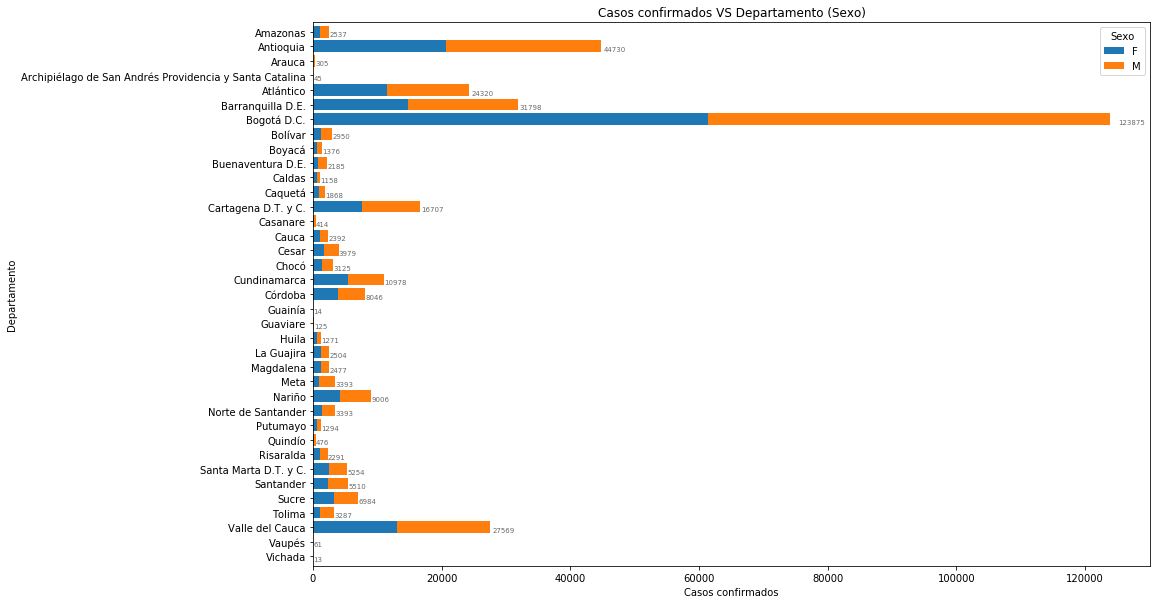

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               135      456      515   
Antioquia                                             1518     3108    11707   
Arauca                                                  14       57       99   
Archipiélago de San Andrés Providencia y Santa ...       0        1       14   
Atlántico                                             1100     1928     5208   
Barranquilla D.E.                                     1223     2102     6917   
Bogotá D.C.                                           5463     9379    28398   
Bolívar                                                146      281      671   
Boyacá                                                  75      141      288   
Buenaventura D.E.                                       47      286      503   
Caldas                                                  46       90      253   
Caquetá                                                 55      108      533   
Cartagena D.T. y C.                                    772     1237     3811   
Casanare                                                18       20      122   
Cauca                                                  105      195      555   
Cesar                                                  245      343      940   
Chocó                                                  132      275      749   
Cundinamarca                                           510      825     2557   
Córdoba                                                249      469     1650   
Guainía                                                  0        2        4   
Guaviare                                                 1       34       29   
Huila                                                   65      122      294   
La Guajira                                             132      242      524   
Magdalena                                              131      175      460   
Meta                                                    74      276     1036   
Nariño                                                 396      743     2104   
Norte de Santander                                      98      158      773   
Putumayo                                                38      109      384   
Quindío                                                 14       25      116   
Risaralda                                              135      204      534   
Santa Marta D.T. y C.                                  216      368     1159   
Santander                                              201      355     1266   
Sucre                                                  282      570     1454   
Tolima                                                 143      193      886   
Valle del Cauca                                        900     1805     6301   
Vaupés                                                   4        5       19   
Vichada                                                  3        4        2   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                482      347      281   
Antioquia                                             11274     6913     5327   
Arauca                                                   76       28       18   
Archipiélago de San Andrés Providencia y Santa ...       12       10        5   
Atlántico                                              5591     3861     3195   
Barranquilla D.E.                                      7537     4994     4266   
Bogotá D.C.                                           27409    20044    16817   
Bolívar                                                 680      412      273   
Boyacá                                                  263      224 

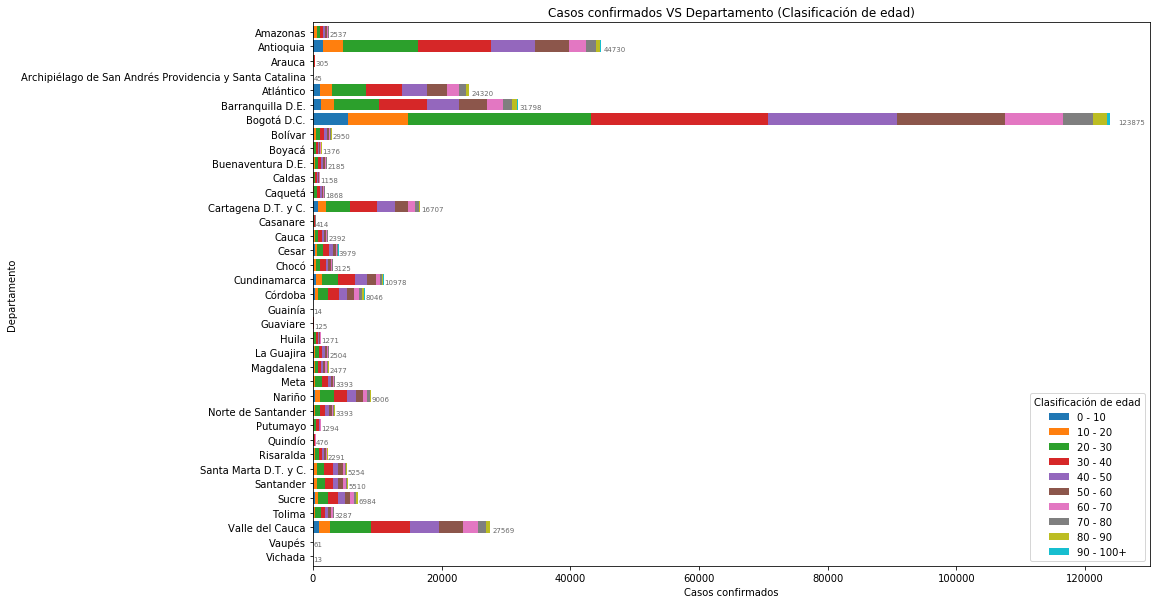

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               61.0      104.0   
Antioquia                                           25232.0      736.0   
Arauca                                                124.0        6.0   
Archipiélago de San Andrés Providencia y Santa ...     10.0        0.0   
Atlántico                                            4433.0     1114.0   
Barranquilla D.E.                                    4734.0     1521.0   
Bogotá D.C.                                         56004.0     3375.0   
Bolívar                                              1010.0      133.0   
Boyacá                                                660.0       33.0   
Buenaventura D.E.                                     187.0      149.0   
Caldas                                                682.0       16.0   
Caquetá                                              1221.0       47.0   
Cartagena D.T. y C.                                  2539.0      479.0   
Casanare                                              211.0        6.0   
Cauca                                                 929.0       83.0   
Cesar                                                1701.0       82.0   
Chocó                                                 402.0      111.0   
Cundinamarca                                         4337.0      293.0   
Córdoba                                              3509.0      789.0   
Guainía                                                 0.0        1.0   
Guaviare                                               64.0        0.0   
Huila                                                 616.0       27.0   
La Guajira                                            737.0      140.0   
Magdalena                                             507.0      230.0   
Meta                                                 1203.0       45.0   
Nariño                                               2667.0      299.0   
Norte de Santander                                   1764.0      187.0   
Putumayo                                              737.0       57.0   
Quindío                                               228.0        9.0   
Risaralda                                            1233.0       44.0   
Santa Marta D.T. y C.                                1960.0      181.0   
Santander                                            2922.0      185.0   
Sucre                                                2001.0      391.0   
Tolima                                               1296.0       73.0   
Valle del Cauca                                      9144.0      992.0   
Vaupés                                                  1.0        1.0   
Vichada                                                11.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                 6.0           4.0   
Antioquia                                             1654.0         161.0   
Arauca                                                  12.0           3.0   
Archipiélago de San Andrés Providencia y Santa ...       1.0           1.0   
Atlántico                                              491.0          74.0   
Barranquilla D.E.                                      724.0          79.0   
Bogotá D.C.                                           6143.0         319.0   
Bolívar                                                115.0           9.0   
Boyacá                                                  80.0           7.0   
Buenaventura D.E.                                      108.0          24.0   
Caldas                                                  42.0          10.0   
Caquetá                                                127.0           5.0   
Cartagena D.T. y C.  

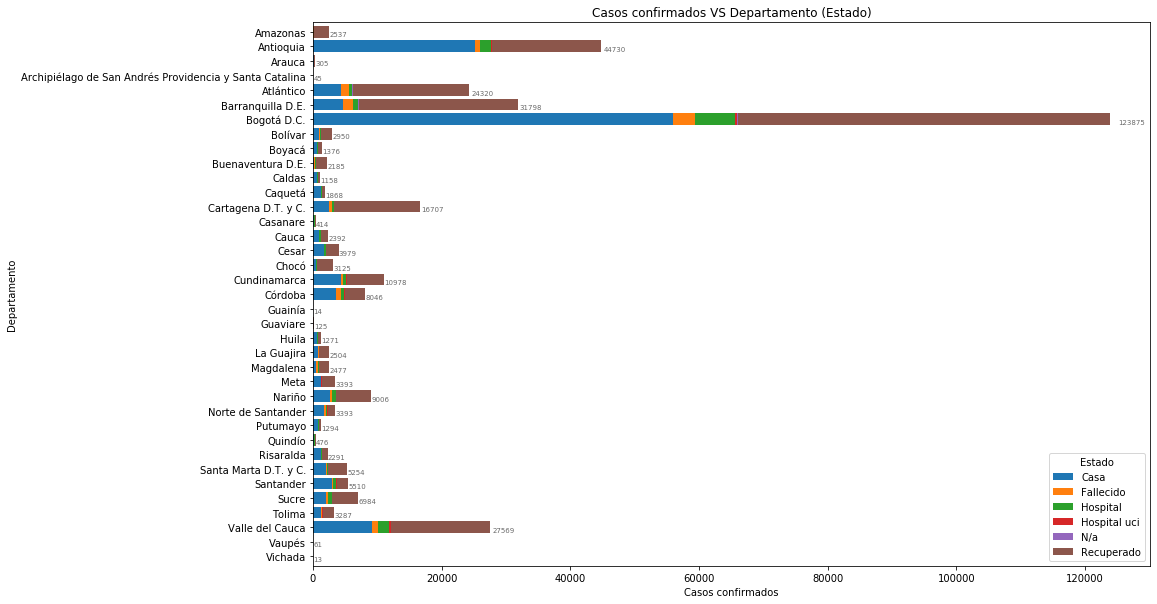

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Estado                     
Casa          66164   68913
Fallecido      4334    7605
Hospital       6849    9214
Hospital uci    533     998
N/a             319     426
Recuperado    91038  101317

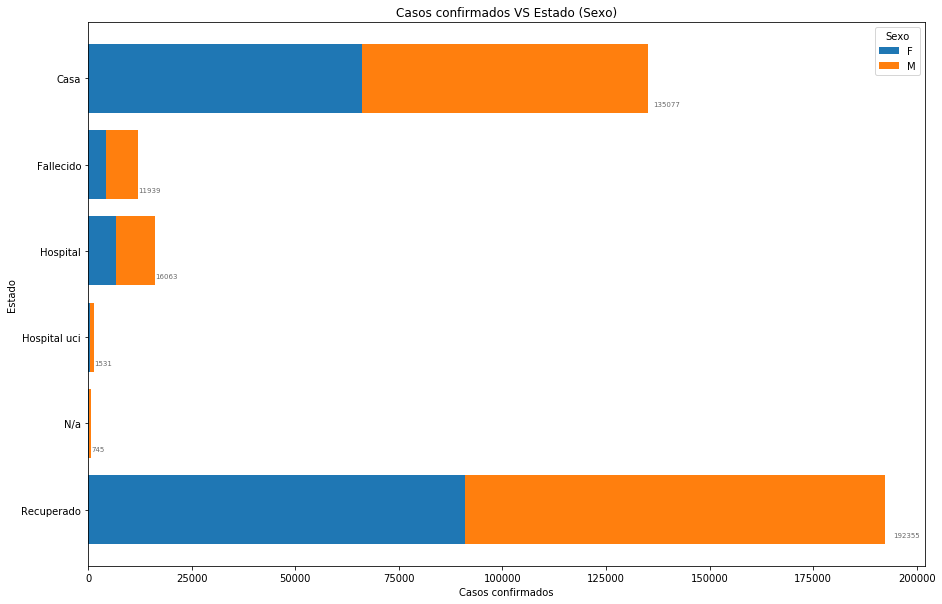

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     5452    10442    33464    33189    22012    16863   
Fallecido                  24       21      169      412      918     1813   
Hospital                  643      328     1171     1838     2363     3329   
Hospital uci               70       26       61      158      237      366   
N/a                        22       16       35       30       57       90   
Recuperado               8475    15858    47935    47096    30853    23451   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      8163     3726     1500        266  
Fallecido                 2863     3013     2208        498  
Hospital                  3148     2101     1000        142  
Hospital uci               347      205       56          5  
N/a                        149      161      143         42  
Recuperado               11436     4994     1950        307

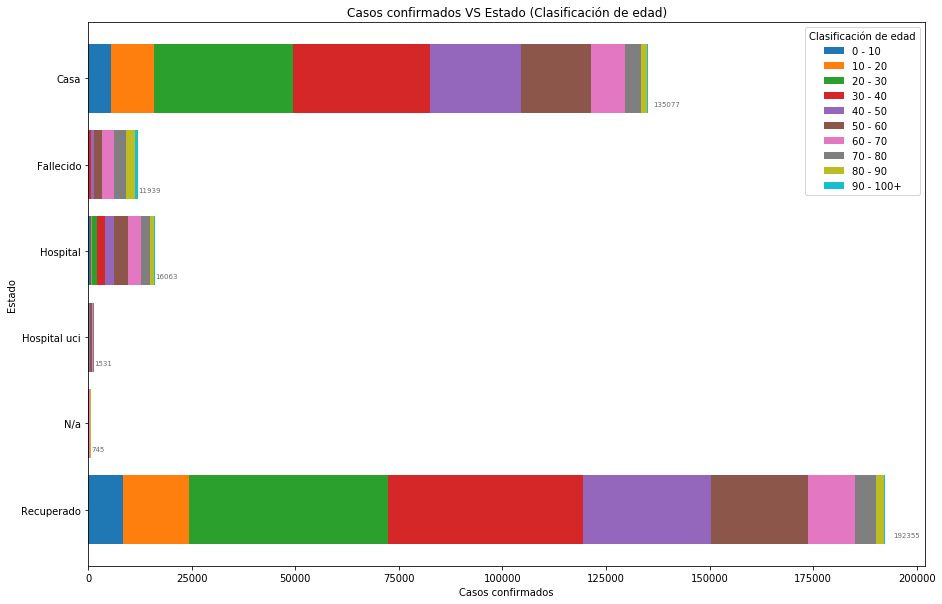

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   162310  172922
Importado       458     520
Relacionado    6469   15031

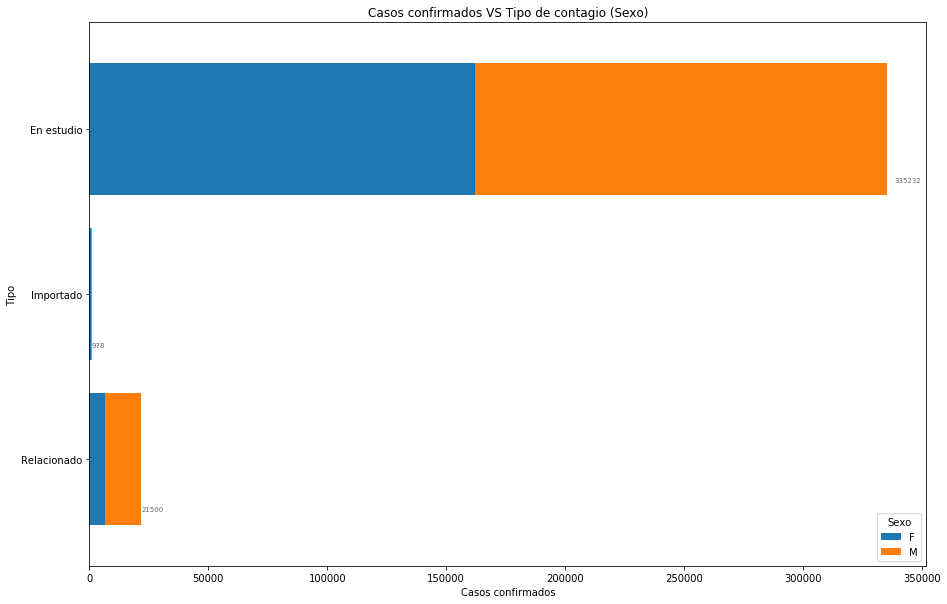

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              13760    24101    76641    77264    53371    43706   
Importado                   5       38      243      229      173      151   
Relacionado               921     2552     5951     5230     2896     2055   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               24969    13670     6558       1192  
Importado                   94       35        9          1  
Relacionado               1043      495      290         67

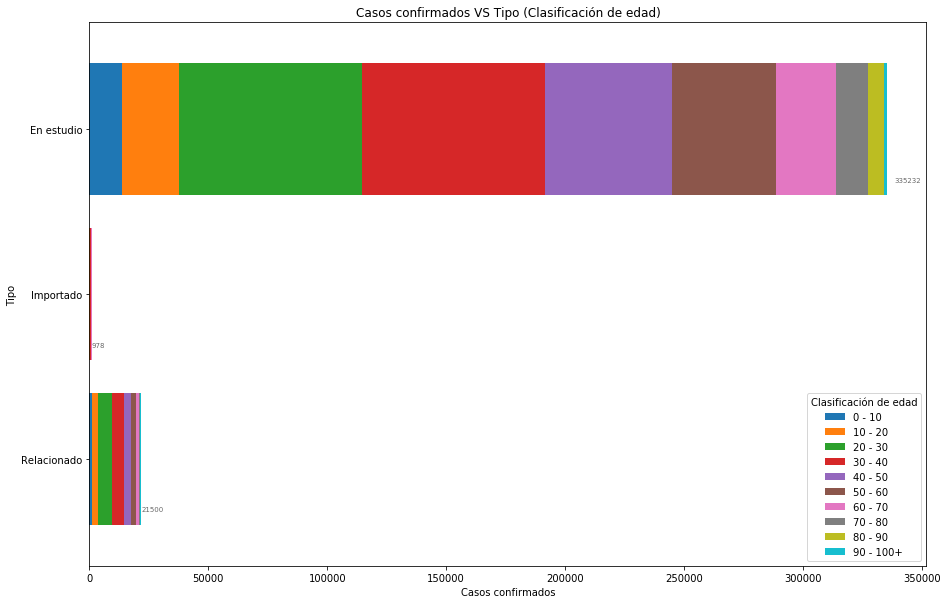

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  7178   7508
10 - 20                12469  14222
20 - 30                40077  42758
30 - 40                38545  44178
40 - 50                26781  29659
50 - 60                21577  24335
60 - 70                12035  14071
70 - 80                 6455   7745
80 - 90                 3397   3460
90 - 100+                723    537

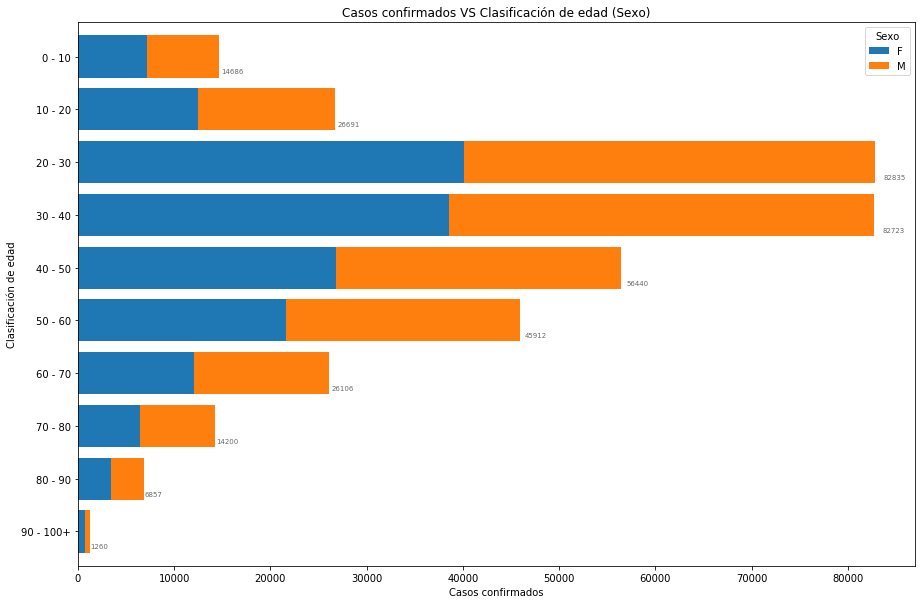

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  5452         24       643            70   22   
10 - 20                10442         21       328            26   16   
20 - 30                33464        169      1171            61   35   
30 - 40                33189        412      1838           158   30   
40 - 50                22012        918      2363           237   57   
50 - 60                16863       1813      3329           366   90   
60 - 70                 8163       2863      3148           347  149   
70 - 80                 3726       3013      2101           205  161   
80 - 90                 1500       2208      1000            56  143   
90 - 100+                266        498       142             5   42   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       8475  
10 - 20                     15858  
20 - 30                     47935  
30 - 40                     47096  
40 - 50                     30853  
50 - 60                     23451  
60 - 70                     11436  
70 - 80                      4994  
80 - 90                      1950  
90 - 100+                     307

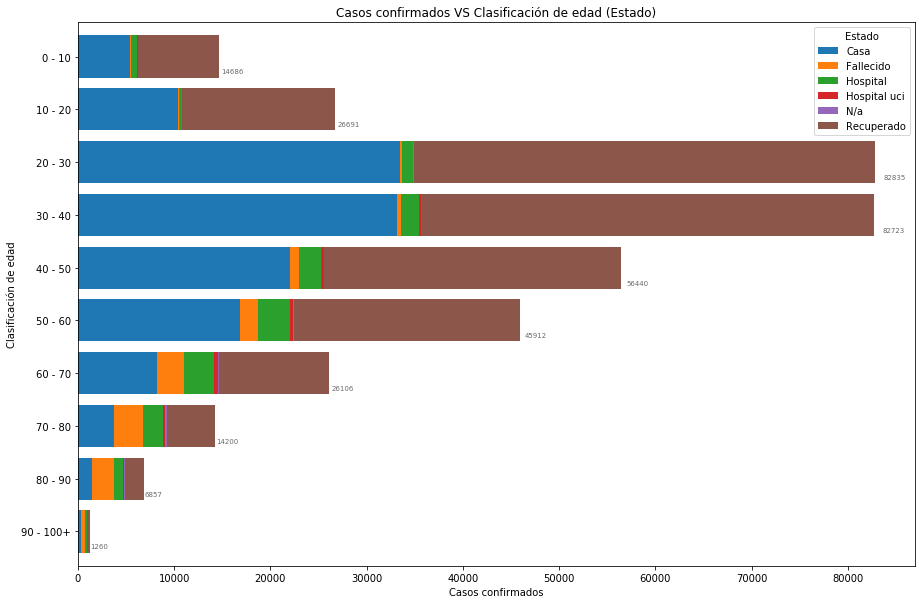

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-08-03            3475.0  3665.0
2020-08-04            4729.0  4799.0
2020-08-05            3345.0  3142.0
2020-08-06             346.0   293.0
2020-08-23               0.0     1.0

[152 rows x 2 columns]

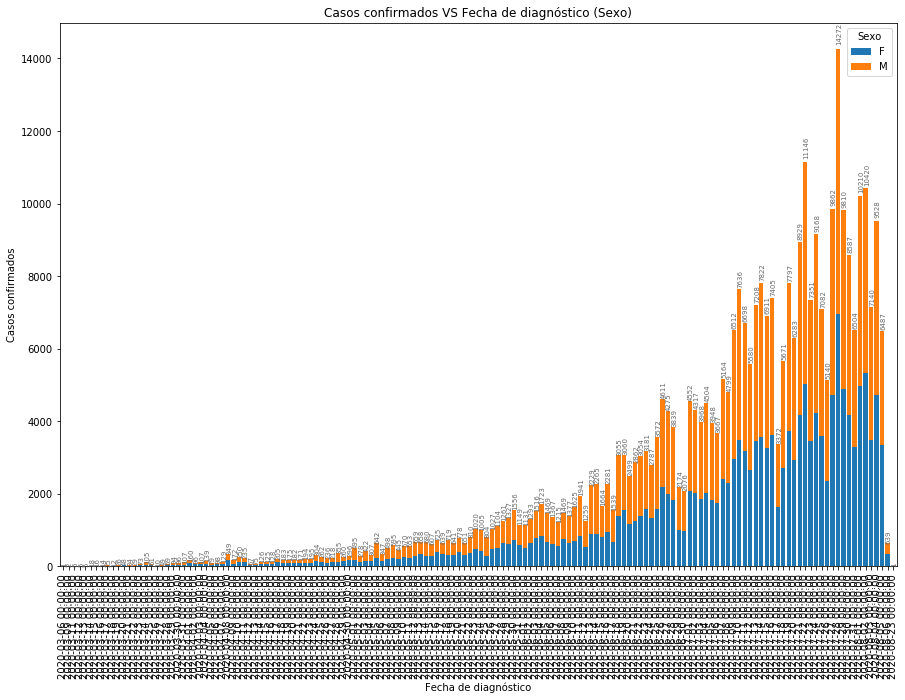

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-08-03                241      498     1615     1641     1089      984   
2020-08-04                392      667     2209     2188     1560     1319   
2020-08-05                270      434     1485     1436     1042      878   
2020-08-06                 29       59      140      135      101       77   
2020-08-23                  0        0        0        1        0        0   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-08-03                 554      339      155         24  
2020-08-04                 678      332      157         26  
2020-08-05                 502      273      144         23  
2020-08-06                  43       32       21          2  
2020-08-23                   0        0        0          0  

[152 rows x 10 columns]

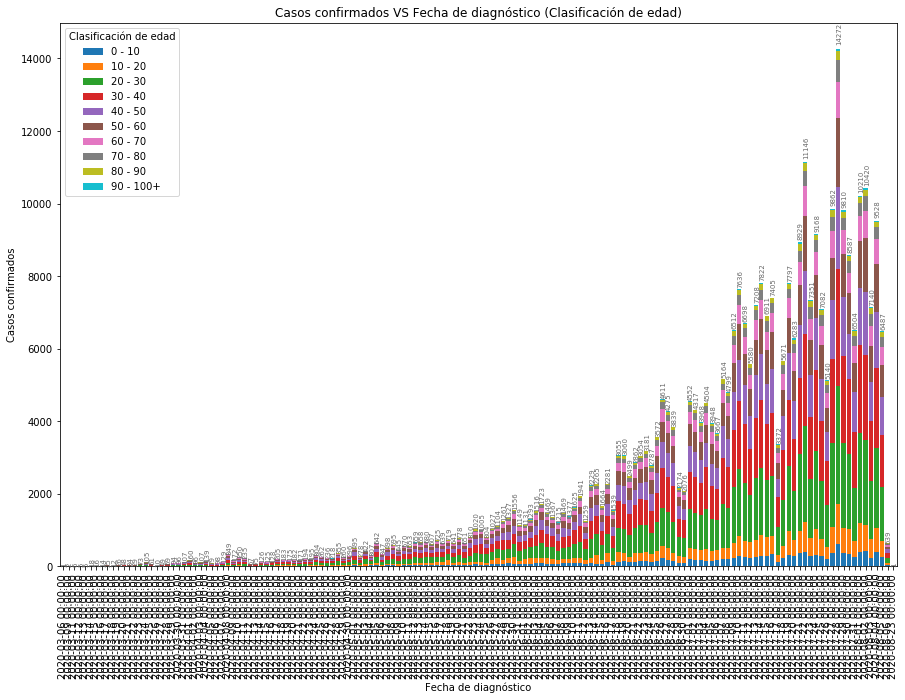

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-08-03            6468.0      118.0     526.0          21.0  7.0   
2020-08-04            8940.0       75.0     499.0          12.0  2.0   
2020-08-05            5999.0        0.0     467.0          21.0  0.0   
2020-08-06             607.0        0.0      29.0           3.0  0.0   
2020-08-23               1.0        0.0       0.0           0.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-08-03                   0.0  
2020-08-04                   0.0  
2020-08-05                   0.0  
2020-08-06                   0.0  
2020-08-23                   0.0  

[152 rows x 6 columns]

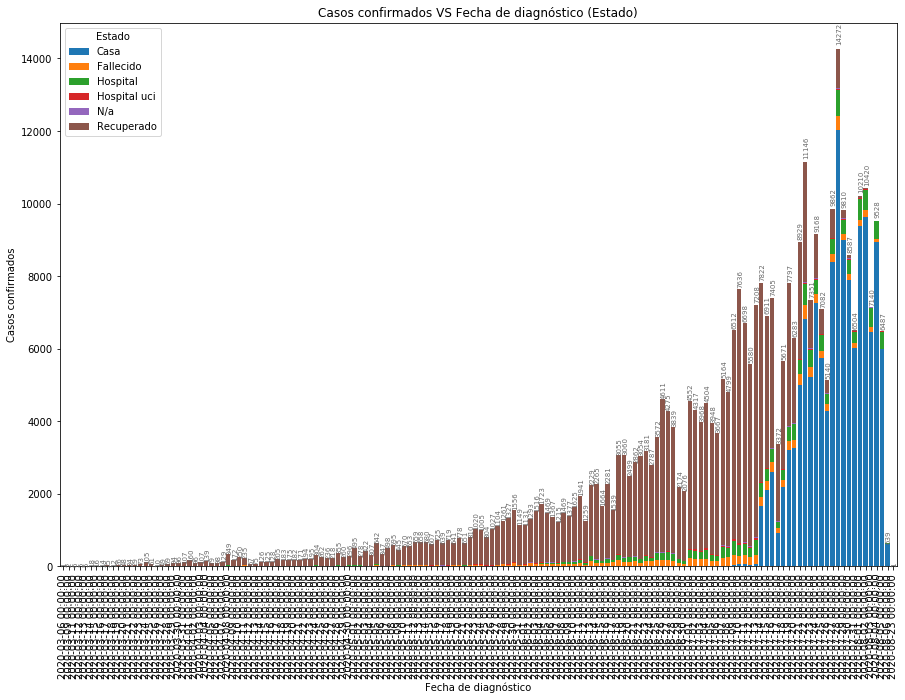

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-08-03            159035.0  178256.0
2020-08-04            163764.0  183055.0
2020-08-05            167109.0  186197.0
2020-08-06            167455.0  186490.0
2020-08-23            167455.0  186491.0

[152 rows x 2 columns]

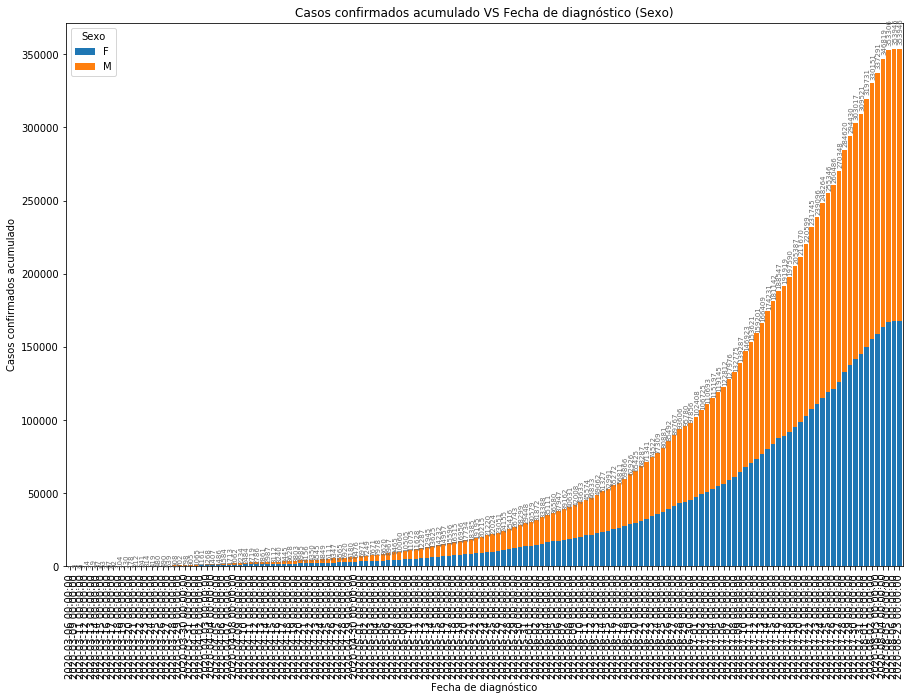

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-08-03              13862    25262    78111    78057    53183    43174   
2020-08-04              14254    25929    80320    80245    54743    44493   
2020-08-05              14524    26363    81805    81681    55785    45371   
2020-08-06              14553    26422    81945    81816    55886    45448   
2020-08-23              14553    26422    81945    81817    55886    45448   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-08-03               24589    13404     6450       1199  
2020-08-04               25267    13736     6607       1225  
2020-08-05               25769    14009     6751       1248  
2020-08-06               25812    14041     6772       1250  
2020-08-23               25812    14041     6772       1250  

[152 rows x 10 columns]

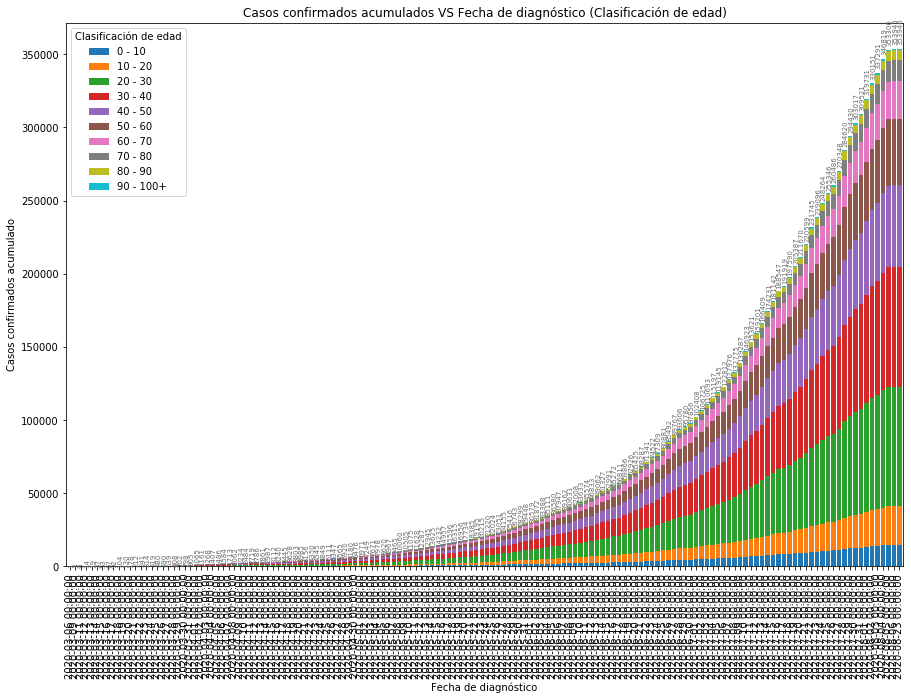

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-08-03            119493.0    11673.0   14941.0        1467.0  722.0   
2020-08-04            128433.0    11748.0   15440.0        1479.0  724.0   
2020-08-05            134432.0    11748.0   15907.0        1500.0  724.0   
2020-08-06            135039.0    11748.0   15936.0        1503.0  724.0   
2020-08-23            135040.0    11748.0   15936.0        1503.0  724.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-08-03              188995.0  
2020-08-04              188995.0  
2020-08-05              188995.0  
2020-08-06              188995.0  
2020-08-23              188995.0  

[152 rows x 6 columns]

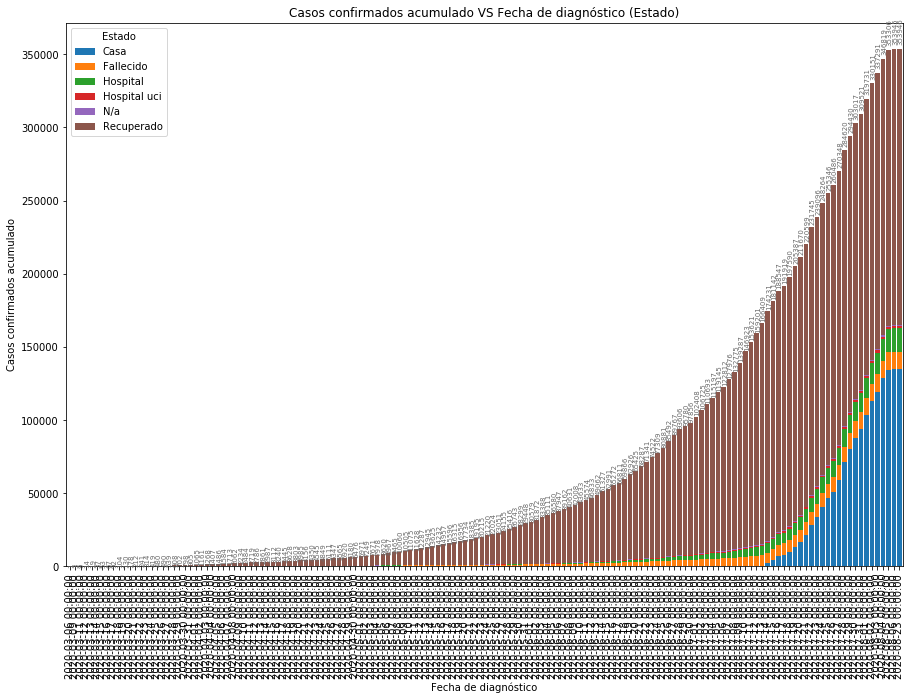

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>